In [1]:
import warnings
warnings.filterwarnings('ignore')
from tensorflow.compat.v1 import keras
from keras.datasets import imdb
#For early stopping 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os, glob
import seaborn as sns
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras import models
from keras import layers
# Layers that are used to implement the LSTM model
from tensorflow.keras.layers import Dense, Embedding, LSTM, SpatialDropout1D, Dropout,Bidirectional,GRU
# Used to create the Sequential model
from keras.models import Sequential

# Helped to create train and test data
from sklearn.model_selection import train_test_split

# Helps to pad the sequences into the same length
from tensorflow.keras.preprocessing.sequence import pad_sequences

# Metrics to evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

from tensorflow.keras.preprocessing.text import Tokenizer

from sklearn import metrics
#!pip install tqdm
from tqdm import tqdm

2023-07-08 22:59:14.663733: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


# Part A

PROJECT OBJECTIVE: To Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

1. Import and analyse the data set. [5 Marks]

    Hint: - Use `imdb.load_data()` method
    - Get train and test set
    - Take 10000 most frequent words

In [2]:
num_vocab_words = 10000

In [3]:
(X_train, y_train), (X_test, y_test)=imdb.load_data(num_words=num_vocab_words)

In [4]:
X= np.concatenate((X_train, X_test),axis=0)
y=np.asarray(np.concatenate((y_train, y_test), axis=0))

In [5]:
unique, counts = np.unique(y, return_counts=True)

In [6]:
print("Total Number of samples:", len(X))
print("Total Number of negative and postitive comments :", unique, counts)

Total Number of samples: 50000
Total Number of negative and postitive comments : [0 1] [25000 25000]



The classes are balenced both Postitive and negative reviews are having 25000 each

***

<AxesSubplot:ylabel='count'>

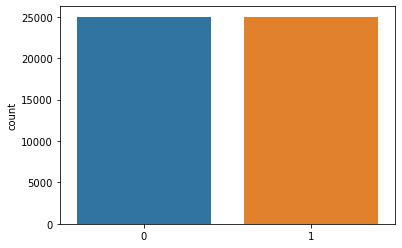

In [7]:
sns.countplot(y)

 2. Perform relevant sequence adding on the data. [5 Marks]

In [ ]:
# Padding the sequences
X_sequenced=pad_sequences(X, maxlen=200)

In [ ]:
# Padding the sequences
X_sequenced.shape

(50000, 200)

In [ ]:
X_sequenced

array([[   5,   25,  100, ...,   19,  178,   32],
       [   0,    0,    0, ...,   16,  145,   95],
       [   0,    0,    0, ...,    7,  129,  113],
       ...,
       [   0,    0,    0, ...,   21,  846, 5518],
       [   0,    0,    0, ..., 2302,    7,  470],
       [   0,    0,    0, ...,   34, 2005, 2643]], dtype=int32)

3. Perform following data analysis: [5 Marks]   
• Print shape of features and labels    
• Print value of any one feature and it's label   

In [ ]:
print("Shape of features:", X_sequenced.shape)
print("Shape of label:", y.shape)
print("Labels:", np.unique(y))


Shape of features: (50000, 200)
Shape of label: (50000,)
Labels: [0 1]


In [ ]:
print('value of feature 1', X_sequenced[1])

value of feature 1 [   0    0    0    0    0    0    0    0    0    0    0    1  194 1153
  194 8255   78  228    5    6 1463 4369 5012  134   26    4  715    8
  118 1634   14  394   20   13  119  954  189  102    5  207  110 3103
   21   14   69  188    8   30   23    7    4  249  126   93    4  114
    9 2300 1523    5  647    4  116    9   35 8163    4  229    9  340
 1322    4  118    9    4  130 4901   19    4 1002    5   89   29  952
   46   37    4  455    9   45   43   38 1543 1905  398    4 1649   26
 6853    5  163   11 3215    2    4 1153    9  194  775    7 8255    2
  349 2637  148  605    2 8003   15  123  125   68    2 6853   15  349
  165 4362   98    5    4  228    9   43    2 1157   15  299  120    5
  120  174   11  220  175  136   50    9 4373  228 8255    5    2  656
  245 2350    5    4 9837  131  152  491   18    2   32 7464 1212   14
    9    6  371   78   22  625   64 1382    9    8  168  145   23    4
 1690   15   16    4 1355    5   28    6   52  154  462   

In [ ]:
print('value of label 1', y[1])

value of label 1 0


4. Decode the feature value to get original sentence [5 Marks]

In [ ]:
print(X[11])
print(y[11])

[1, 54, 13, 1610, 14, 20, 13, 69, 55, 364, 1398, 21, 54, 13, 219, 12, 13, 1706, 15, 4, 20, 16, 329, 6, 176, 329, 74, 51, 13, 873, 4, 156, 71, 78, 4, 7412, 322, 16, 31, 7, 4, 249, 4, 65, 16, 38, 379, 12, 100, 157, 18, 6, 910, 20, 549, 18, 4, 1496, 21, 14, 31, 9, 24, 6, 212, 12, 9, 6, 1322, 991, 7, 3002, 4, 425, 9, 73, 2218, 549, 18, 31, 155, 36, 100, 763, 379, 20, 103, 351, 5308, 13, 202, 12, 2241, 5, 6, 320, 46, 7, 457]
0


In [ ]:
original_sentence_index = imdb.get_word_index()
reverse_sentence_index = dict([(sentence_value, sentence_key) for (sentence_key, sentence_value) in original_sentence_index.items()]) 
decoded_feature_value = " ".join( [reverse_sentence_index.get(i - 3, "#") for i in X[11]] )
print('decoded feature value ',decoded_feature_value) 

decoded feature value  # when i rented this movie i had very low expectations but when i saw it i realized that the movie was less a lot less than what i expected the actors were bad the doctor's wife was one of the worst the story was so stupid it could work for a disney movie except for the murders but this one is not a comedy it is a laughable masterpiece of stupidity the title is well chosen except for one thing they could add stupid movie after dead husbands i give it 0 and a half out of 5


5. Design, train, tune and test a sequential model. [5 Marks]

    Hint: The aim here Is to import the text, process it such a way that it can be taken as an inout to the ML/NN classifiers.           Be analytical and experimental here in trying new approaches to design the best model.

In [16]:
movie_review_model = Sequential()

movie_review_model.add(Embedding(num_vocab_words, 100, input_length = X_sequenced.shape[1]))

movie_review_model.add(SpatialDropout1D(0.2))

movie_review_model.add(LSTM(100, dropout = 0.2, recurrent_dropout = 0.2))

movie_review_model.add(Dense(1, activation = 'sigmoid'))

2023-07-08 21:52:32.203532: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
print(movie_review_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          1000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 1,080,501
Trainable params: 1,080,501
Non-trainable params: 0
_________________________________________________________________
None


In [18]:
# Splitting the data into training and testing
mv_X_train, mv_X_test, mv_y_train, mv_y_test = train_test_split(X_sequenced, y, test_size = 0.3, random_state = 42)

In [19]:
# compile the model
movie_review_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [20]:
# specifying the batch size 
batch_size = 64

# fitting the model on the training data with 10 epochs
movie_results = movie_review_model.fit(mv_X_train, mv_y_train, epochs = 5, validation_split=.2, batch_size = batch_size, verbose = 'auto')

Epoch 1/5
438/438 [==============================] - 206s 462ms/step - loss: 0.4285 - accuracy: 0.7984 - val_loss: 0.4441 - val_accuracy: 0.8354
Epoch 2/5
438/438 [==============================] - 201s 459ms/step - loss: 0.2518 - accuracy: 0.9011 - val_loss: 0.2880 - val_accuracy: 0.8809
Epoch 3/5
438/438 [==============================] - 197s 449ms/step - loss: 0.2046 - accuracy: 0.9218 - val_loss: 0.3158 - val_accuracy: 0.8783
Epoch 4/5
438/438 [==============================] - 195s 445ms/step - loss: 0.1751 - accuracy: 0.9342 - val_loss: 0.3532 - val_accuracy: 0.8493
Epoch 5/5
438/438 [==============================] - 198s 453ms/step - loss: 0.1444 - accuracy: 0.9457 - val_loss: 0.3373 - val_accuracy: 0.8729


In [79]:
print(np.mean(movie_results.history["val_accuracy"]))

0.8633428692817688


6. Use the designed model to print the prediction on any one sample. [5 Marks]

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


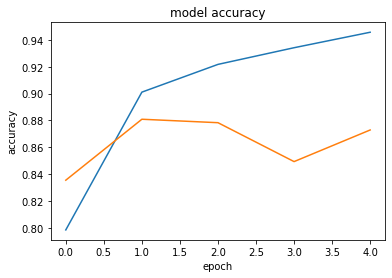

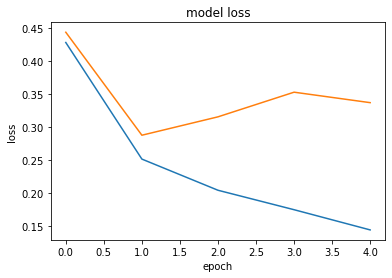

In [21]:

print(movie_results.history.keys())
plt.plot(movie_results.history['accuracy'])
plt.plot(movie_results.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(movie_results.history['loss'])
plt.plot(movie_results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
#plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [36]:
mv_y_pred=movie_review_model.predict(mv_X_test)

469/469 [==============================] - 30s 64ms/step


In [37]:
mv_y_pred

array([[0.00197342],
       [0.02846412],
       [0.30459937],
       ...,
       [0.8374092 ],
       [0.07715368],
       [0.25533545]], dtype=float32)

In [38]:
mvr_y_pred_new=movie_review_model.predict(mv_X_test[1][None,...])

1/1 [==============================] - 0s 51ms/step


In [80]:
print('prediction for sample 1',mvr_y_pred_new.round())

prediction for sample 1 [[0.]]


In [41]:
print("Classification Report")
print(metrics.classification_report(mv_y_test, mv_y_pred.round(), labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.87      0.88      7602
           0       0.87      0.89      0.88      7398

    accuracy                           0.88     15000
   macro avg       0.88      0.88      0.88     15000
weighted avg       0.88      0.88      0.88     15000



***
The sequential model is performing good, if you look at precision , recall and f1-scores are looking good. I have trained the model for 5 epoch only because of resorces crunch, if we increase the ecoph furthur, we can see even better accuracy, precison.
***

# Part B

• PROJECT OBJECTIVE: Build a sequential NLP classifier which can use input text parameters to determine the
customer sentiments.

Steps and tasks: [ Total Score: 30 Marks]    
1. Read and explore the data [3 Marks]


In [42]:
sar_headlines_df = pd.read_json('Sarcasm_Headlines_Dataset.json', lines=True)

In [43]:
sar_headlines_df

,is_sarcastic,headline,article_link
0,1,thirtysomething scientists unveil doomsday clo...,https://www.theonion.com/thirtysomething-scien...
1,0,dem rep. totally nails why congress is falling...,https://www.huffingtonpost.com/entry/donna-edw...
2,0,eat your veggies: 9 deliciously different recipes,https://www.huffingtonpost.com/entry/eat-your-...
3,1,inclement weather prevents liar from getting t...,https://local.theonion.com/inclement-weather-p...
4,1,mother comes pretty close to using word 'strea...,https://www.theonion.com/mother-comes-pretty-c...
...,...,...,...
28614,1,jews to celebrate rosh hashasha or something,https://www.theonion.com/jews-to-celebrate-ros...
28615,1,internal affairs investigator disappointed con...,https://local.theonion.com/internal-affairs-in...
28616,0,the most beautiful acceptance speech this week...,https://www.huffingtonpost.com/entry/andrew-ah...
28617,1,mars probe destroyed by orbiting spielberg-gat...,https://www.theonion.com/mars-probe-destroyed-...


In [44]:
sar_headlines_df['headline'][1]

'dem rep. totally nails why congress is falling short on gender, racial equality'

In [45]:
sar_headlines_df['headline'] = sar_headlines_df['headline'].apply(lambda x: x.replace(u'\xa0',u' '))
sar_headlines_df['headline'] = sar_headlines_df['headline'].apply(lambda x: x.replace('\u200a',' '))

<AxesSubplot:xlabel='is_sarcastic', ylabel='count'>

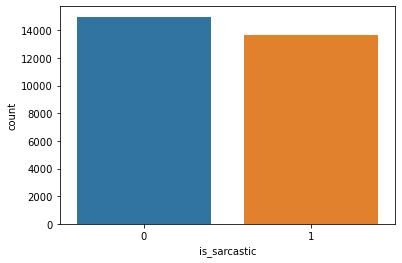

In [46]:
sns.countplot(sar_headlines_df.is_sarcastic)

In [47]:
sar_headlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
 2   article_link  28619 non-null  object
dtypes: int64(1), object(2)
memory usage: 670.9+ KB


In [48]:
sar_headlines_df.describe()

,is_sarcastic
count,28619.000000
mean,0.476397
std,0.499451
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


2. Retain relevant columns [3 Marks]


In [49]:
sar_headlines_df.drop(['article_link'], axis=1, inplace=True)

In [50]:
sar_headlines_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   is_sarcastic  28619 non-null  int64 
 1   headline      28619 non-null  object
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


3. Get length of each sentence [3 Marks]


In [51]:
sar_headlines_len=sar_headlines_df['headline'].str.len()

In [52]:
sar_headlines_len

0        61
1        79
2        49
3        52
4        61
         ..
28614    44
28615    87
28616    71
28617    61
28618    34
Name: headline, Length: 28619, dtype: int64

4. Define parameters [3 Marks]


In [53]:
embedding_size=300
maxlength=50
batch_size=64
#print("max_sequence_len : ", max_sequence_len)
print("embedding_size : ", embedding_size)

embedding_size :  300


5. Get indices for words [3 Marks]


In [54]:
# Creating the tokenizer with 10000 vocab size
tokenizer = Tokenizer(num_words = 10000, split = ' ') 

tokenizer.fit_on_texts(sar_headlines_df['headline'].values)

# converting text to sequences
X = tokenizer.texts_to_sequences(sar_headlines_df['headline'].values)

In [55]:
total_words = len(tokenizer.word_index) + 1
print("Total number of words: ", total_words)
print("Total number of indices: ",len(tokenizer.word_index)+1)
print("report: ", tokenizer.word_index['report'])

Total number of words:  30872
Total number of indices:  30872
report:  39


6. Create features and labels [3 Marks]


In [56]:
sar_headlines_df['is_sarcastic'].value_counts()

0    14985
1    13634
Name: is_sarcastic, dtype: int64

In [57]:
# Padding the sequences
sar_hl_X = pad_sequences(X, maxlen= maxlength)

# creating the target feature
sar_hl_y =np.asarray(sar_headlines_df['is_sarcastic'])


In [58]:
sar_hl_X[5]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 82, 72],
      dtype=int32)

In [59]:
sar_hl_y[5]

0

7. Get vocabulary size [3 Marks]


In [60]:
vocab_size = len(tokenizer.word_index)

In [61]:
vocab_size

30871

8. Create a weight matrix using GloVe embeddings [3 Marks]


In [62]:
# load the GloVe vectors in a dictionary:

embeddings_index = {}
f = open(r'glove.6B/glove.6B.50d.txt', encoding="utf8")

for line in tqdm(f):
    # Splitting the each line 
    values = line.split()
    
    word = values[0]
    
    coefs = np.array(values[1:], dtype='float32')
    
    embeddings_index[word] = coefs
    
f.close()

print('Found %s word vectors.' % len(embeddings_index))

400000it [00:07, 55862.84it/s]

Found 400000 word vectors.


In [63]:
embedding_matrix = np.zeros((vocab_size+1, 50))

for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [64]:
embedding_matrix.shape

(30872, 50)

9. Define and compile a Bidirectional LSTM model. [3 Marks]    

Hint: Be analytical and experimental here in trying new approaches to design the best model.


In [65]:
sar_hl_model = Sequential()

sar_hl_model.add(Embedding(embedding_matrix.shape[0], 50, input_length = embedding_matrix.shape[1], weights=[embedding_matrix], trainable=True))

sar_hl_model.add(SpatialDropout1D(0.2))

sar_hl_model.add(Bidirectional(LSTM(150, dropout = 0.2, recurrent_dropout = 0.2)))

sar_hl_model.add(Dense(1, activation = 'sigmoid'))

In [66]:
# compile the model
sar_hl_model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

In [67]:
sar_hl_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 50, 50)            1543600   
                                                                 
 spatial_dropout1d_1 (Spatia  (None, 50, 50)           0         
 lDropout1D)                                                     
                                                                 
 bidirectional (Bidirectiona  (None, 300)              241200    
 l)                                                              
                                                                 
 dense_1 (Dense)             (None, 1)                 301       
                                                                 
Total params: 1,785,101
Trainable params: 1,785,101
Non-trainable params: 0
_________________________________________________________________


10. Fit the model and check the validation accuracy [3 Marks]

In [68]:
# Splitting the data into training and testing
sar_hl_X_train, sar_hl_X_test, sar_hl_y_train, sar_hl_y_test = train_test_split(sar_hl_X, sar_hl_y, test_size = 0.3, random_state = 42)

In [69]:
sar_hl_history = sar_hl_model.fit(sar_hl_X_train, sar_hl_y_train, batch_size = batch_size , validation_data = (sar_hl_X_test,sar_hl_y_test) , epochs = 10)


Epoch 1/10
314/314 [==============================] - 138s 417ms/step - loss: 0.5603 - accuracy: 0.7097 - val_loss: 0.4376 - val_accuracy: 0.7934
Epoch 2/10
314/314 [==============================] - 135s 430ms/step - loss: 0.4072 - accuracy: 0.8171 - val_loss: 0.3513 - val_accuracy: 0.8452
Epoch 3/10
314/314 [==============================] - 138s 440ms/step - loss: 0.3345 - accuracy: 0.8538 - val_loss: 0.3200 - val_accuracy: 0.8615
Epoch 4/10
314/314 [==============================] - 145s 463ms/step - loss: 0.2886 - accuracy: 0.8767 - val_loss: 0.2978 - val_accuracy: 0.8682
Epoch 5/10
314/314 [==============================] - 129s 412ms/step - loss: 0.2514 - accuracy: 0.8962 - val_loss: 0.2943 - val_accuracy: 0.8722
Epoch 6/10
314/314 [==============================] - 143s 455ms/step - loss: 0.2195 - accuracy: 0.9081 - val_loss: 0.2960 - val_accuracy: 0.8761
Epoch 7/10
314/314 [==============================] - 137s 437ms/step - loss: 0.1950 - accuracy: 0.9211 - val_loss: 0.2966 -

In [85]:
print(' Validaton Accuracy :',np.mean(movie_results.history["val_accuracy"]))

 Validaton Accuracy : 0.8633428692817688


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


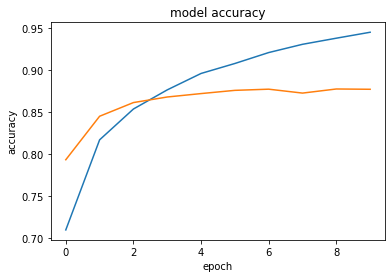

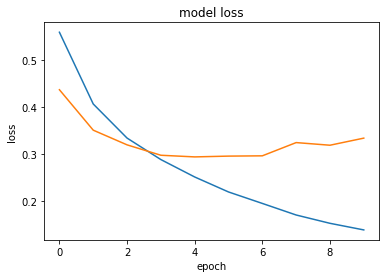

In [70]:

print(sar_hl_history.history.keys())
plt.plot(sar_hl_history.history['accuracy'])
plt.plot(sar_hl_history.history['val_accuracy']) 
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(sar_hl_history.history['loss'])
plt.plot(sar_hl_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [71]:
sar_hl_y_pred=sar_hl_model.predict(sar_hl_X_test)

269/269 [==============================] - 16s 56ms/step


In [72]:
sar_hl_y_pred

array([[0.07363352],
       [0.9965387 ],
       [0.9999855 ],
       ...,
       [0.404089  ],
       [0.00618896],
       [0.99975014]], dtype=float32)

In [81]:
sar_hl_y_pred_new=sar_hl_model.predict(sar_hl_X_test[2][None,...])

1/1 [==============================] - 0s 62ms/step


In [82]:
print('prediction for sample 2',sar_hl_y_pred_new.round())

prediction for sample 2 [[1.]]


In [83]:

print("Classification Report")
print(metrics.classification_report(sar_hl_y_test, sar_hl_y_pred.round(), labels=[1,0]))

Classification Report
              precision    recall  f1-score   support

           1       0.89      0.85      0.87      4131
           0       0.86      0.91      0.88      4455

    accuracy                           0.88      8586
   macro avg       0.88      0.88      0.88      8586
weighted avg       0.88      0.88      0.88      8586



***
The model gave validation accuracy of 86%. Precision, recall, f1-scores are also looking good. we trained the model with only 10 epochs, because of resource crunch, we can increase the epoch inorder to have furthur better validation accuracy, precision, recall.
***